# Convolutional Neural Networks

The problem when dealing with larger dataset is the overfitting encoutered when using MLP. The overfitting is the behavior of not generalizing well to non-training data. 

![](images/overfitting.png)

We will introduce a popular kind of model called **Convolutional neural networks** that is specially good for processing images. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
batch_size = 32

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=transforms.ToTensor())

valid_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, 
                                                batch_size=batch_size, 
                                                shuffle=False)

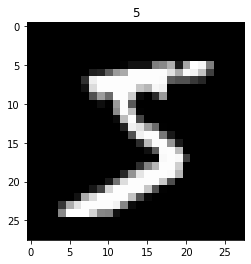

In [3]:
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

The architecture of the CNN is composed of several operations. 

![](images/cnn.jpeg)
Source: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )        
        
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)    
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)        
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [5]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [6]:
loss_func = nn.CrossEntropyLoss() 
optimizer = optim.Adam(cnn.parameters(), lr = 0.01) 

In [7]:
num_epochs = 10

def train(num_epochs, cnn):
    
    cnn.train()
        
    # Train the model
    total_step = len(train_loader)
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()                # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))               
                pass
        pass
    pass
    
train(num_epochs, cnn)

Epoch [1/10], Step [100/1875], Loss: 0.0397
Epoch [1/10], Step [200/1875], Loss: 0.1628
Epoch [1/10], Step [300/1875], Loss: 0.0253
Epoch [1/10], Step [400/1875], Loss: 0.0150
Epoch [1/10], Step [500/1875], Loss: 0.4441
Epoch [1/10], Step [600/1875], Loss: 0.0630
Epoch [1/10], Step [700/1875], Loss: 0.4389
Epoch [1/10], Step [800/1875], Loss: 0.0004
Epoch [1/10], Step [900/1875], Loss: 0.0604
Epoch [1/10], Step [1000/1875], Loss: 0.0321
Epoch [1/10], Step [1100/1875], Loss: 0.2176
Epoch [1/10], Step [1200/1875], Loss: 0.1992
Epoch [1/10], Step [1300/1875], Loss: 0.0758
Epoch [1/10], Step [1400/1875], Loss: 0.1028
Epoch [1/10], Step [1500/1875], Loss: 0.0101
Epoch [1/10], Step [1600/1875], Loss: 0.2153
Epoch [1/10], Step [1700/1875], Loss: 0.0144
Epoch [1/10], Step [1800/1875], Loss: 0.0601
Epoch [2/10], Step [100/1875], Loss: 0.0271
Epoch [2/10], Step [200/1875], Loss: 0.1383
Epoch [2/10], Step [300/1875], Loss: 0.0944
Epoch [2/10], Step [400/1875], Loss: 0.1262
Epoch [2/10], Step [500

In [8]:
def validate():
    cnn.eval()    
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_loader:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
    pass

validate()

Test Accuracy of the model on the 10000 test images: 1.00
